In [1]:
# Importing LIbraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading Dataset

In [9]:
df=pd.read_csv('/Users/abhaysharma/Downloads/mymoviedb (1).csv', engine='python')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


# Exploratory Data Analysis

1 Removing Null Values

In [15]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   object 
 5   Vote_Average       9826 non-null   object 
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 767.7+ KB


2 Removing Columns

In [20]:
df.drop(['Overview','Original_Language','Poster_Url'], axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9826 non-null   object 
 1   Title         9826 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   object 
 4   Vote_Average  9826 non-null   object 
 5   Genre         9826 non-null   object 
dtypes: float64(1), object(5)
memory usage: 537.4+ KB


3 Changing DataType

In [25]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
df['Vote_Count']=df['Vote_Count'].astype('int')
df['Vote_Average']=df['Vote_Average'].astype('float')

In [27]:
df['Release_Date']=df['Release_Date'].dt.year

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


4 categorize Vote_Count to (not_popular, below_avg, average, popular)

In [34]:
def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
          df[col].describe()['25%'],
          df[col].describe()['50%'],
          df[col].describe()['75%'],
          df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges, labels=labels)
    return df

In [36]:
labels=['not_popular','below_avg','average','popular']

categorize_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896,popular,"Drama, Crime"
9833,2020,Violent Delights,13.356,8,not_popular,Horror
9834,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9835,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


5 After Categorizing Vote_Average column, we have to remove nul values.

In [39]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9726 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  9726 non-null   int32   
 1   Title         9726 non-null   object  
 2   Popularity    9726 non-null   float64 
 3   Vote_Count    9726 non-null   int64   
 4   Vote_Average  9726 non-null   category
 5   Genre         9726 non-null   object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 427.6+ KB


In [41]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

6. Spliting the Genre Column to a List

In [44]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)

In [46]:
df['Genre']=df['Genre'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [48]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# Data Visulaization

In [51]:
sns.set_style('whitegrid')

# Ques1:- What is the most frequent Genre of the movies released on Netflix?

In [57]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

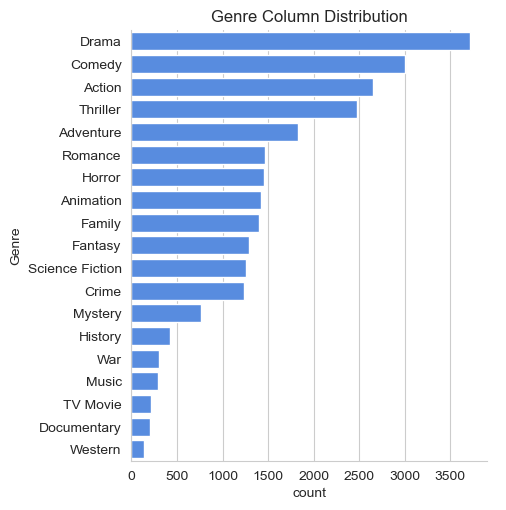

In [59]:
sns.catplot(y='Genre', data=df, kind='count', order=df['Genre'].value_counts().index, color='#4287f5')
plt.title('Genre Column Distribution')
plt.show()

# Ques2:- Which has highest votes in the vote_avg column?

In [62]:
df['Vote_Average'].describe()

count       25551
unique          4
top       average
freq         6612
Name: Vote_Average, dtype: object

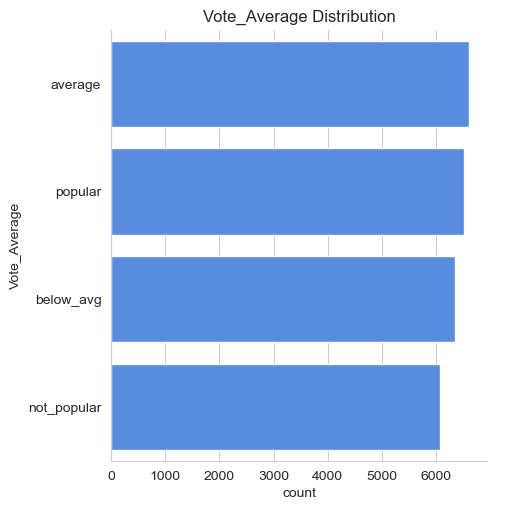

In [70]:
sns.catplot(y='Vote_Average', data=df, kind='count', order=df['Vote_Average'].value_counts().index, color='#4287f5')
plt.title('Vote_Average Distribution')
plt.show()

# Ques3:- Which movie get the highest popularity? What's its Genre?

In [81]:
df['Popularity'].max()
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# Ques4:- Which movie get the lowest popularity? What's its Genre?

In [88]:
df['Popularity'].min()
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984,Threads,13.354,186,popular,War
25549,1984,Threads,13.354,186,popular,Drama
25550,1984,Threads,13.354,186,popular,Science Fiction


# Ques5:- Which year has most filmmed movies?

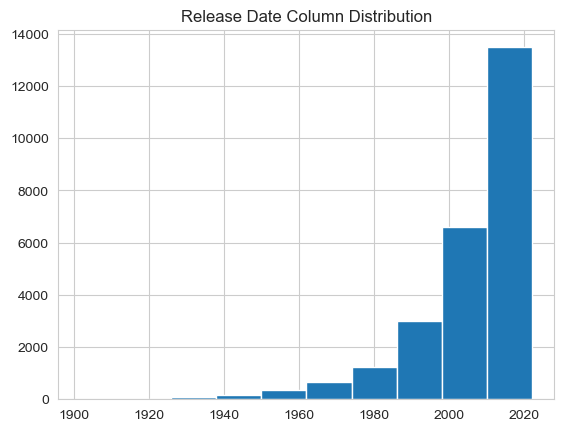

In [91]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

Conclusion:-
Q1:- What is the most frequent genre in the dataset?
A:- Drama genre is the most frequent genre in our dataset.

Q2:- Which genre has highest vote?
A:- Drame gets again the highest popularity among fans.

Q3:- Which movie got the highest popularity? What its Genre?
A:- Spiderman: No Way Home has the highest popularity rate in our dataset and it has genre of Action, Advanture and Science Fiction.

Q4:- Which movie got the lowest popularity? What its Genre?
A:- The United States vs. Billie Holiday and Threads has the lowest rate in our dataset and it has genre of Music, Drama, History and 
War, Drama, Science Fiction.

Q5:- Which year has most filmmed movie?
A:- Year 2020 has the highest filming rate in our dataset.